<a href="https://colab.research.google.com/github/sashabruns/RDF-Extensions-for-Cultural-Heritage/blob/main/framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A Framework for Scenario-Based Evaluation
This notebook visualizes the application of the framework for evaluating temporal modeling approaches in cultural heritage knowledge graphs. Below, we outline the main components and variables used in the analysis.

*   *labels* - evaluation criteria
*   *min_scores* - each criterion has a minimum score of 1
*   *max_scores* - the maximum score varies based on the complexity of each criterion.
* *perfect_score* - the ideal outcome for all criteria, set as the baseline for comparison.
* *approaches* - a dictionary that contains the scores for each approach across all criteria.
* *weights* - weights assigned to each criterion based on their importance in the specific scenario being modeled. The sum of the weights should equal 1.0.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import pi

In [38]:
labels = ['Number of Triples', 'RDF Syntax Extension', 'Model Semantics', 'Query Language', 'Temporal Semantics', 'OWL Reasoning', 'Ease-of-Use']
approaches = {
    'tRDF': [3, 1, 1, 1, 2, 2, 3],
    '4D Fluents': [3, 5, 2, 2, 1, 1, 1],
    'RDF*': [2, 3, 1, 3, 4, 2, 2],
    'N-ary Relations': [2, 5, 2, 1, 4, 3, 4],
    'Singleton Property': [2, 4, 3, 2, 4, 3, 3],
    'Named Graphs': [1, 2, 1, 1, 4, 1, 2]
}
num_vars = len(labels)
min_scores = [1, 1, 1, 1, 1, 1, 1]
max_scores = [3, 5, 3, 4, 4, 4, 4]
perfect_score = [1, 1, 1, 1, 1, 1, 1]

In [39]:
def normalize(scores, min_scores, max_scores):
    return [(score - min_score) / (max_score - min_score) for score, min_score, max_score in zip(scores, min_scores, max_scores)]

normalized_perfect_score = normalize(perfect_score, min_scores, max_scores)
normalized_approaches = {approach: normalize(scores, min_scores, max_scores) for approach, scores in approaches.items()}

def calculate_weighted_scores(normalized_scores, weights):
    return np.array(normalized_scores) * weights

def calculate_weighted_distance(scores1, scores2, weights):
    diff = np.array(scores1) - np.array(scores2)
    weighted_diff = diff * weights
    return np.sqrt(sum(weighted_diff ** 2))

In [48]:
#weights for each requirement based on scenario
weights = np.array([0.3, 0.05, 0.25, 0.1, 0.05, 0.05, 0.2]) #scenario 1
#weights = np.array([0.2, 0.05, 0.05, 0.1, 0.1, 0.4, 0.1]) #scenario 2
#weights = np.array([0.00, 0.2, 0.00, 0.15, 0.15, 0.00, 0.5]) #scenario 3

In [49]:
weighted_perfect_score = calculate_weighted_scores(normalized_perfect_score, weights)

weighted_scores = {}
distances = {}
for approach, normalized_scores in normalized_approaches.items():
    individual_weighted_scores = calculate_weighted_scores(normalized_scores, weights)
    weighted_scores[approach] = individual_weighted_scores
    distances[approach] = np.linalg.norm(individual_weighted_scores - weighted_perfect_score)

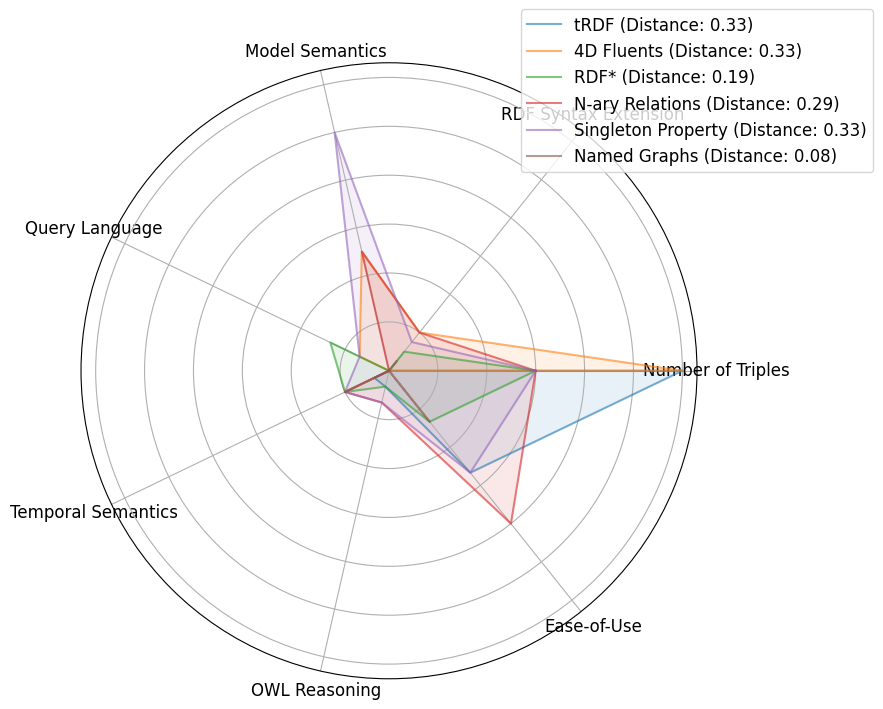

tRDF: 0.33
4D Fluents: 0.33
RDF*: 0.19
N-ary Relations: 0.29
Singleton Property: 0.33
Named Graphs: 0.08


In [50]:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for approach, values in weighted_scores.items():
    values = values.tolist() + values[:1].tolist()
    ax.plot(angles, values, label=f'{approach} (Distance: {distances[approach]:.2f})', alpha=0.6)
    ax.fill(angles, values, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)


plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

plt.show()

for approach, distance in distances.items():
    print(f'{approach}: {distance:.2f}')